In [1]:
import numpy as np
import cv2
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import mlab
import os
import json

In [2]:
numbersFile = "../Logs/numbersOfficial.pk"
visitedList = "../Logs/facesExtracted.data"

In [3]:
lists = []
infile = open(numbersFile, 'r')
while 1:
    try:
        lists.append(pickle.load(infile))
    except (EOFError):
        break
infile.close()

In [4]:
PostID = np.zeros((len(lists),1) , dtype='i8')
totFrames = np.zeros((len(lists),1) , dtype='i8')
faceFrames = np.zeros((len(lists),1) , dtype='i8')
totFaces = np.zeros((len(lists),1) , dtype='i8')
for i in range(len(lists)):
    log = lists[i].split(',')
    PostID[i] = int(log[0])
    totFrames[i] = int(log[1])
    faceFrames[i] = int(log[2])
    totFaces[i] = int(log[3])

In [5]:
percentages = np.zeros((len(PostID),1))
for i in range(len(PostID)):
    percentages[i] = float(faceFrames[i])/float(totFrames[i])

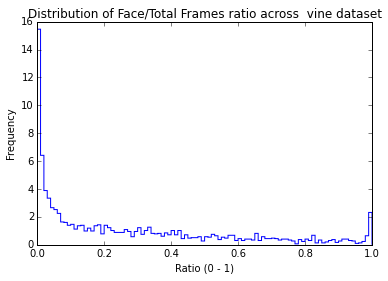

In [6]:

plt.hist(percentages , 100 , normed =1 , histtype='step' , cumulative=False)
plt.title("Distribution of Face/Total Frames ratio across  vine dataset")
plt.xlabel("Ratio (0 - 1)")
plt.ylabel("Frequency")
plt.show()


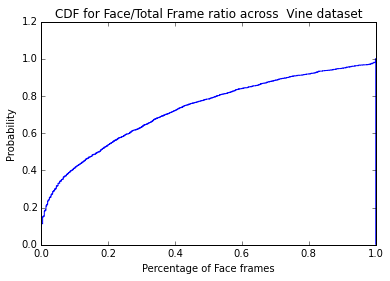

In [7]:
n, bins, patches = plt.hist(percentages, 1000, normed=1,histtype='step', cumulative=True)
# y = mlab.normpdf(bins, percentages).cumsum()
# y /= y[-1]
#plt.plot(bins, n, 'k--', linewidth=1.5)
plt.title("CDF for Face/Total Frame ratio across  Vine dataset")
plt.xlabel("Percentage of Face frames")
plt.ylabel("Probability")
plt.show()


In [50]:

def getVisited():
    visited = []
    f = open(visitedList, 'rb')
    visited = pickle.load(f)
    return visited


def walkLevel1Dir(root):
    count = 0
    dirList = []
    filesList = []
    for path, dirs, files in os.walk(root):
        if count > 0:
            return dirList , fileList
        dirList = dirs
        fileList = files
        count = count + 1


def getPopularFile(rootDir):
    f = open(rootDir + '/popular.json' ,'r')
    data = json.load(f)
    return data

    
    
def getPopularPosts(popular , loopThreshold):
    records = popular['data']['records']
    posts=[]
    for i in range (0 , len(records)):
        loopCount = records[i]['reposts']['count']
        if(loopCount > loopThreshold):
            posts.append(records[i])
    return posts

In [51]:
root = "../vinedata/Data/"
dirs,files = walkLevel1Dir(root)
visited = getVisited()
selectedPosts = []

for d in dirs:
    if d in visited:
        dataRoot = root + d
        popular = getPopularFile(dataRoot)
        posts = getPopularPosts(popular , 5000)
        selectedPosts += posts
        #print len(posts)

In [52]:
print len(selectedPosts)

373


In [53]:
selectedIDs = []
for post in selectedPosts:
    selectedIDs.append(post['postId'])


In [54]:
indices = np.arange(PostID.shape[0])[np.in1d(PostID, selectedIDs)]

In [55]:

selPercentages = np.zeros((len(indices),1))
for i in range(len(indices)):
    selPercentages[i] = float(faceFrames[indices[i]])/float(totFrames[indices[i]])

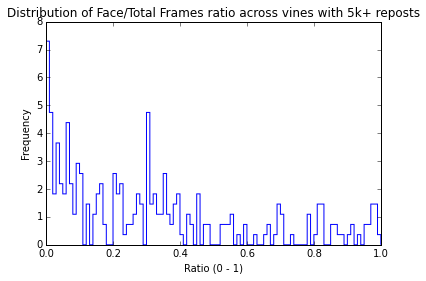

In [58]:
plt.hist(selPercentages , 100 , normed =1 , histtype='step' , cumulative=False)
plt.title("Distribution of Face/Total Frames ratio across vines with 5k+ reposts")
plt.xlabel("Ratio (0 - 1)")
plt.ylabel("Frequency")
plt.show()


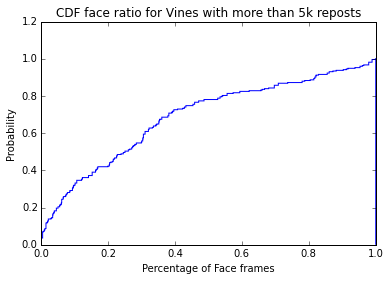

In [59]:
n, bins, patches = plt.hist(selPercentages, 1000, normed=1,histtype='step', cumulative=True)
# y = mlab.normpdf(bins, percentages).cumsum()
# y /= y[-1]
#plt.plot(bins, n, 'k--', linewidth=1.5)
plt.title("CDF face ratio for Vines with more than 5k reposts")
plt.xlabel("Percentage of Face frames")
plt.ylabel("Probability")
plt.show()

In [ ]:
np.